In [1]:
import os

In [3]:
smoke_dir = os.path.join('C:/Users/Ghaida/Desktop/SDAIA/deep learning/project/dataset/training_data/smoking')
notsmoke_dir = os.path.join('C:/Users/Ghaida/Desktop/SDAIA/deep learning/project/dataset/training_data/notsmoking')

In [5]:
print('total training smoke images:', len(os.listdir(smoke_dir)))
print('total training not smoke images:', len(os.listdir(notsmoke_dir)))


total training smoke images: 805
total training not smoke images: 805


In [6]:
smoke_files = os.listdir(smoke_dir)
print(smoke_files[:10])

notsmoke_files = os.listdir(notsmoke_dir)
print(notsmoke_files[:10])

['smoking_0001.jpg', 'smoking_0002.jpg', 'smoking_0003.jpg', 'smoking_0004.jpg', 'smoking_0005.jpg', 'smoking_0006.jpg', 'smoking_0007.jpg', 'smoking_0009.jpg', 'smoking_0010.jpg', 'smoking_0011.jpg']
['notsmoking_0001.JPG', 'notsmoking_0002.jpg', 'notsmoking_0003.jpg', 'notsmoking_0004.jpg', 'notsmoking_0006.jpg', 'notsmoking_0007.jpg', 'notsmoking_0008.jpg', 'notsmoking_0009.jpg', 'notsmoking_0010.jpg', 'notsmoking_0011.jpg']


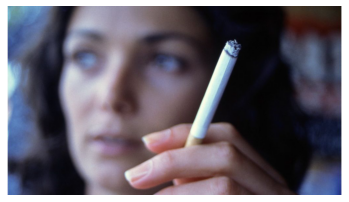

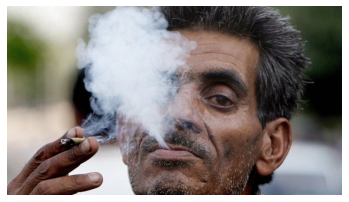

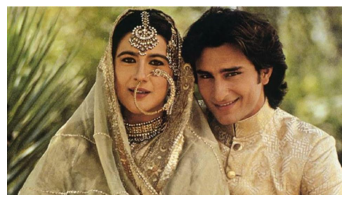

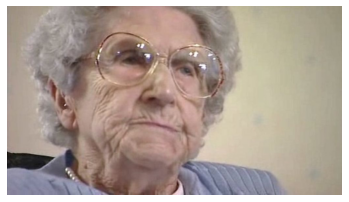

In [7]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

pic_index = 2

next_smoke = [os.path.join(smoke_dir, fname) 
                for fname in smoke_files[pic_index-2:pic_index]]

next_notsmoke = [os.path.join(notsmoke_dir, fname) 
                for fname in notsmoke_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_smoke+next_notsmoke):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [11]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "C:/Users/Ghaida/Desktop/SDAIA/deep learning/project/dataset/training_data"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "C:/Users/Ghaida/Desktop/SDAIA/deep learning/project/dataset/validation_data"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(TRAINING_DIR,target_size=(150,150),class_mode='categorical',batch_size=126)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,target_size=(150,150),class_mode='categorical',batch_size=126)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)



history = model.fit(train_generator, validation_data=(validation_generator),epochs=25 , steps_per_epoch=20 , verbose = 1, validation_steps=3)   


model.save("rps.h5")

Found 1610 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                     

InvalidArgumentError:  logits and labels must be broadcastable: logits_size=[126,3] labels_size=[126,2]
	 [[node categorical_crossentropy/softmax_cross_entropy_with_logits
 (defined at C:\Users\Ghaida\anaconda3400\lib\site-packages\keras\backend.py:5009)
]] [Op:__inference_train_function_3658]

Errors may have originated from an input operation.
Input Source operations connected to node categorical_crossentropy/softmax_cross_entropy_with_logits:
In[0] categorical_crossentropy/softmax_cross_entropy_with_logits/Reshape:	
In[1] categorical_crossentropy/softmax_cross_entropy_with_logits/Reshape_1:

Operation defined at: (most recent call last)
>>>   File "C:\Users\Ghaida\anaconda3400\lib\runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\asyncio\base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\asyncio\base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\asyncio\events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "C:\Users\Ghaida\AppData\Local\Temp/ipykernel_6268/352852147.py", line 55, in <module>
>>>     history = model.fit(train_generator, validation_data=(validation_generator),epochs=25 , steps_per_epoch=20 , verbose = 1, validation_steps=3)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\keras\engine\training.py", line 809, in train_step
>>>     loss = self.compiled_loss(
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
>>>     loss_value = loss_obj(y_t, y_p, sample_weight=sw)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\keras\losses.py", line 141, in __call__
>>>     losses = call_fn(y_true, y_pred)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\keras\losses.py", line 245, in call
>>>     return ag_fn(y_true, y_pred, **self._fn_kwargs)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\keras\losses.py", line 1664, in categorical_crossentropy
>>>     return backend.categorical_crossentropy(
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\keras\backend.py", line 5009, in categorical_crossentropy
>>>     return tf.nn.softmax_cross_entropy_with_logits(
>>> 

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

NameError: name 'history' is not defined

# 2

In [2]:
rock_dir = os.path.join('C:/Users/Ghaida/Desktop/SDAIA/deep learning/project/dataset/training_data/smoking')
paper_dir = os.path.join('C:/Users/Ghaida/Desktop/SDAIA/deep learning/project/dataset/training_data/notsmoking')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])


total training rock images: 805
total training paper images: 805
['smoking_0001.jpg', 'smoking_0002.jpg', 'smoking_0003.jpg', 'smoking_0004.jpg', 'smoking_0005.jpg', 'smoking_0006.jpg', 'smoking_0007.jpg', 'smoking_0009.jpg', 'smoking_0010.jpg', 'smoking_0011.jpg']
['notsmoking_0001.JPG', 'notsmoking_0002.jpg', 'notsmoking_0003.jpg', 'notsmoking_0004.jpg', 'notsmoking_0006.jpg', 'notsmoking_0007.jpg', 'notsmoking_0008.jpg', 'notsmoking_0009.jpg', 'notsmoking_0010.jpg', 'notsmoking_0011.jpg']


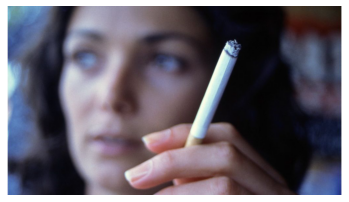

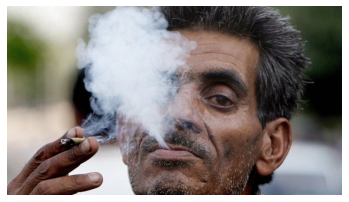

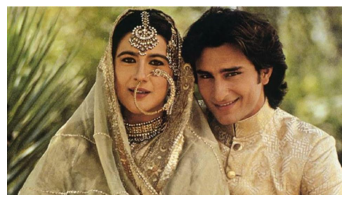

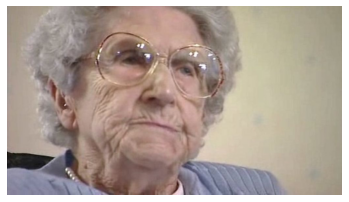

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [4]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "C:/Users/Ghaida/Desktop/SDAIA/deep learning/project/dataset/training_data"
training_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

VALIDATION_DIR = "C:/Users/Ghaida/Desktop/SDAIA/deep learning/project/dataset/validation_data"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(TRAINING_DIR,target_size=(150,150),class_mode='categorical',batch_size=126)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,target_size=(150,150),class_mode='categorical',batch_size=126)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")


Found 1610 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                       

InvalidArgumentError:  logits and labels must be broadcastable: logits_size=[126,3] labels_size=[126,2]
	 [[node categorical_crossentropy/softmax_cross_entropy_with_logits
 (defined at C:\Users\Ghaida\anaconda3400\lib\site-packages\keras\backend.py:5009)
]] [Op:__inference_train_function_1220]

Errors may have originated from an input operation.
Input Source operations connected to node categorical_crossentropy/softmax_cross_entropy_with_logits:
In[0] categorical_crossentropy/softmax_cross_entropy_with_logits/Reshape:	
In[1] categorical_crossentropy/softmax_cross_entropy_with_logits/Reshape_1:

Operation defined at: (most recent call last)
>>>   File "C:\Users\Ghaida\anaconda3400\lib\runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\asyncio\base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\asyncio\base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\asyncio\events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "C:\Users\Ghaida\AppData\Local\Temp/ipykernel_20292/2722295902.py", line 43, in <module>
>>>     history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\keras\engine\training.py", line 809, in train_step
>>>     loss = self.compiled_loss(
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
>>>     loss_value = loss_obj(y_t, y_p, sample_weight=sw)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\keras\losses.py", line 141, in __call__
>>>     losses = call_fn(y_true, y_pred)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\keras\losses.py", line 245, in call
>>>     return ag_fn(y_true, y_pred, **self._fn_kwargs)
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\keras\losses.py", line 1664, in categorical_crossentropy
>>>     return backend.categorical_crossentropy(
>>> 
>>>   File "C:\Users\Ghaida\anaconda3400\lib\site-packages\keras\backend.py", line 5009, in categorical_crossentropy
>>>     return tf.nn.softmax_cross_entropy_with_logits(
>>> 

# 3 VGG19

In [8]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [9]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/Ghaida/Desktop/SDAIA/deep learning/project/dataset/training_data'
valid_path = 'C:/Users/Ghaida/Desktop/SDAIA/deep learning/project/dataset/validation_data'

In [10]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


80150528/80134624 [==============================] - 13s 0us/step


In [11]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [12]:
  # useful for getting number of output classes
folders = glob('C:/Users/Ghaida/Desktop/SDAIA/deep learning/project/dataset/training_data/*')

In [13]:
folders

['C:/Users/Ghaida/Desktop/SDAIA/deep learning/project/dataset/training_data\\notsmoking',
 'C:/Users/Ghaida/Desktop/SDAIA/deep learning/project/dataset/training_data\\smoking']

In [14]:
x = Flatten()(mobilnet.output)


In [15]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [16]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
from tensorflow.keras.layers import MaxPooling2D


In [18]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 28, 64)      

In [19]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/Ghaida/Desktop/SDAIA/deep learning/project/dataset/training_data',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 1610 images belonging to 2 classes.


In [22]:
training_set

In [23]:
test_set = test_datagen.flow_from_directory('C:/Users/Ghaida/Desktop/SDAIA/deep learning/project/dataset/validation_data',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 400 images belonging to 2 classes.


In [24]:
test_set

In [26]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Ghaida\AppData\Local\Temp/ipykernel_20292/4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
51/51 [==============================] - 152s 3s/step - loss: 1.0023 - accuracy: 0.6385 - val_loss: 0.6524 - val_accuracy: 0.6475
Epoch 2/50
51/51 [==============================] - 145s 3s/step - loss: 0.5405 - accuracy: 0.7161 - val_loss: 0.5984 - val_accuracy: 0.6800
Epoch 3/50
51/51 [==============================] - 143s 3s/step - loss: 0.5072 - accuracy: 0.7472 - val_loss: 0.6174 - val_accuracy: 0.6825
Epoch 4/50
51/51 [==============================] - 144s 3s/step - loss: 0.4910 - accuracy: 0.7596 - val_loss: 0.5619 - val_accuracy: 0.7400
Epoch 5/50
51/51 [==============================] - 141s 3s/step - loss: 0.4670 - accuracy: 0.7708 - val_loss: 0.5612 - val_accuracy: 0.7425
Epoch 6/50
51/51 [==============================] - 156s 3s/step - loss: 0.4375 - accuracy: 0.7882 - val_loss: 0.6588 - val_accuracy: 0.6850
Epoch 7/50
51/51 [==============================] - 161s 3s/step - loss: 0.4455 - accuracy: 0.7795 - val_loss: 0.5891 - val_accuracy: 0.7550
Epoch 8/50
51

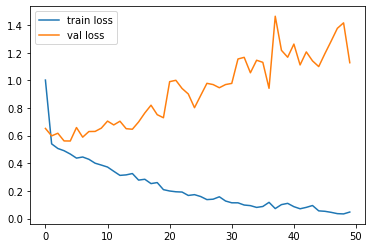

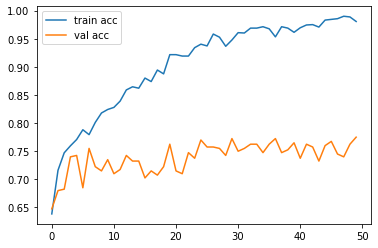

<Figure size 432x288 with 0 Axes>

In [27]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [28]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [29]:
y_pred = model.predict(test_set)

In [30]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [31]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [32]:
model=load_model('model_vgg19.h5')

In [45]:
img=image.load_img('C:/Users/Ghaida/Desktop/SDAIA/deep learning/project/dataset/testing_data/abc227.jpg',target_size=(224,224))

In [46]:
x=image.img_to_array(img)

In [47]:
x.shape


(224, 224, 3)

In [48]:
x=x/255


In [49]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [50]:
model.predict(img_data)


array([[0., 1.]], dtype=float32)

In [51]:
a=np.argmax(model.predict(img_data), axis=1)


In [52]:
if(a==1):
    print("smoking")
else:
    print("notsmoking")

smoking
